# MNIST DNN classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.0.0


## Import the MNIST dataset

In [2]:
mnist = keras.datasets.mnist # 宣告物件
#前段是訓練資料集與標準答案，後段是測試資料集與標準答案
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('done')

done


In [3]:
#分成十類，每類的名稱
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']
print("done")

done


## Explore the data
探索訓練與測試資料 對資料有感覺
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
print(type(train_images.shape)) # 印出訓練資料集的資料型態: tuple
train_images.shape   # 印出訓練資料集的維度

<class 'tuple'>


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
print(type(train_labels))  # 印出訓練資料標準答案的資料型態: numpy array
len(train_labels) #印出訓練資料的標準答案長度 必須是 60000

<class 'numpy.ndarray'>


60000

Each label is an integer between 0 and 9:

In [6]:
train_labels  #印出訓練資料的標準答案

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape  # 印出測試資料集的維度

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels) # 印出測試資料集的長度 必須是 10000

10000

## Preprocess the data
前置處理資料
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

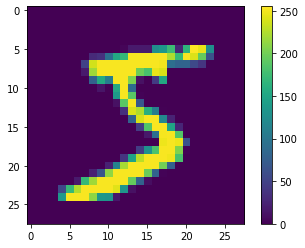

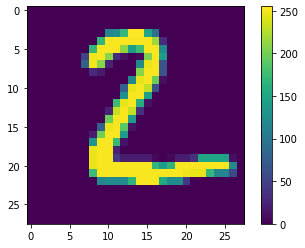

In [9]:
plt.figure()
plt.imshow(train_images[0])  # 印出一張訓練資料影像
plt.colorbar()
plt.gca().grid(False)

plt.figure()
plt.imshow(test_images[1]) # 印出一張測試資料影像
plt.colorbar()
plt.gca().grid(False)

We will scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from and integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [10]:
print(train_images[0]) #印出一張訓練資料 觀察期每個像素的值
train_images = train_images / 255.0 #將訓練資料影像正規化， 將向素值壓在 0~1之間
test_images = test_images / 255.0  #將測試資料影像正規化， 將向素值壓在 0~1之間
print(train_images[0])  # 印出一張正規化的訓練資料觀察其內容

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

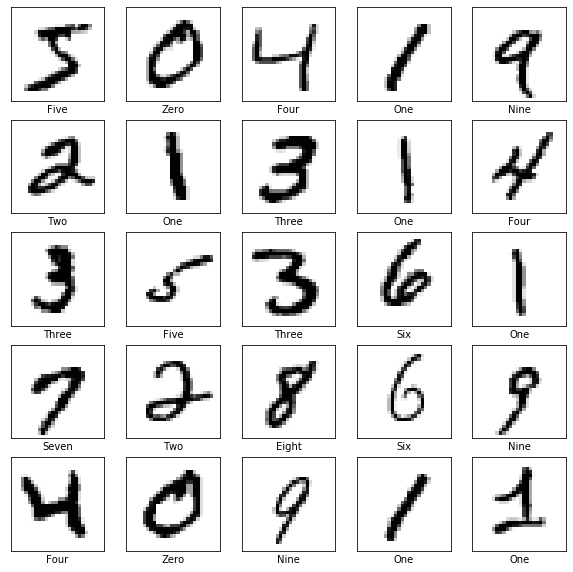

In [11]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.figure(figsize=(10,10))  #預定 10x10 英吋的畫布空間
for i in range(25):       # 迴圈畫出25張照片
    plt.subplot(5,5,i+1)  # 在5x5的格子內，分別劃出第 i+1 子圖， 
    plt.xticks([])        # X 座標 標示是空的
    plt.yticks([])        # Y 座標 標示是空的
    plt.grid(False)       # 不畫小方格
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # 畫出灰階的照片
    plt.xlabel(class_names[train_labels[i]])         # 標示照片的類別
plt.show()   # 顯示圖出來(將所有圖倒出、清空)

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

Let's build a model to classify the images in the MNIST dataset using the following CNN architecture:
0. Input Layer : 784 pixels
1. First Layer : Dense Layer with 16 Neuno, with ReLU activation function
2. Second Layer : Dense Layer with 16 Neuno, with ReLU activation function
3. Last Layer(Output Layer) : Dense Layer (Logits Layer): 10 neurons, with softmax  activation functionone
   for each digit target class (0–9).

In [12]:
print(train_images.shape) #印出訓練資料的維度
#訓練資料維度 (60000,28,28) 轉為 (60000,28,28,1) 代表色彩維度  1-->灰階   3--> 彩色
#測試資料維度 (10000,28,28) 轉為 (10000,28,28,1) 代表色彩維度  1-->灰階   3--> 彩色
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
test_images=test_images.reshape(test_images.shape[0],28,28,1).astype('float32')

#訓練資料標準答案轉為 one hot encoding  5--> [0,0,0,0,0,1,0,0,0,0]  one hot encoding
#測試資料標準答案轉為 one hot encoding  5--> [0,0,0,0,0,1,0,0,0,0]  one hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10) 
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print(train_images.shape)
print(train_images[0])
print("done")
#(60000, 28,28)    (60000,28,28,1)  (1,28,28,1)


(60000, 28, 28)
(60000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
 

In [13]:
print(train_labels[0]) # 檢查一個訓練資料的標準答案是否為 one hot encoding

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
#開始建置神經網路模型
model = keras.Sequential()  # 宣告建置一個 循序的神經網路模型

# 宣告 輸入層為 (28,28,1) tuple 的資料型態
# 將 (28,28,1) 三維 flatten(攤平) 為 一維 :784 
model.add(keras.layers.Flatten(input_shape=(28, 28, 1))) 

#隱藏層 第一層 : 密集神經網路 共有 16個神經元
#激活函數 relu
model.add(keras.layers.Dense(16))  
model.add(keras.layers.Activation('relu'))

#隱藏層 第二層 : 密集神經網路 共有 16個神經元
#激活函數 relu
model.add(keras.layers.Dense(16))
model.add(keras.layers.Activation('relu'))

#輸出層 : 密集神經網路 共有 10個神經元
#激活函數 softmax
model.add(keras.layers.Dense(10, activation="softmax"))

#印出神經網路模型權重參數與架構
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
____________________________________________________

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
# 翻譯神經網路檢查是否有錯，
# 第一個參數宣告 最佳化工具，第二個參數宣告 Loss function， 
# 第三個參數宣告 衡量模型好壞的標準(準確率或是損失函數)
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print('done')

done


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [16]:
#開始訓練模型 使用 fit(擬合)方法，輸入訓練資料與標準答案，訓練回合數
#輸出 每回合訓練時間，Loss 值 ，準確度值
#每回合訓練資料記錄在 history 物件內
#history.keys
history = model.fit(train_images, train_labels, epochs=20) 


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4747 - accuracy: 0.8599
Epoch 2/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2485 - accuracy: 0.9283 - loss: 0.2491 - accuracy
Epoch 3/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2140 - accuracy: 0.9385
Epoch 4/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1947 - accuracy: 0.9432
Epoch 5/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1824 - accuracy: 0.9470
Epoch 6/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1735 - accuracy: 0.9493
Epoch 7/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1647 - accuracy: 0.9521
Epoch 8/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1586 - accuracy: 0.9539
Epoch 9/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.153

{'loss': [0.474730457931757, 0.2485436349173387, 0.21401402036796013, 0.1947321351468563, 0.18241363300234079, 0.17352006283601126, 0.1646843270028631, 0.15856695692067346, 0.153796157553792, 0.14798365854819615, 0.14317486416747172, 0.13995105963399013, 0.13628968347770473, 0.13290119043389956, 0.12804231993804374, 0.12698998602951567, 0.12281640634809932, 0.12094592332852383, 0.11747465008124709, 0.1141293681204319], 'accuracy': [0.8598667, 0.9283, 0.9385333, 0.9432, 0.947, 0.9493167, 0.95206666, 0.9539, 0.9557833, 0.95703334, 0.9585, 0.95858335, 0.95856667, 0.9608, 0.96181667, 0.96235, 0.96278334, 0.9633833, 0.9648333, 0.9657]}


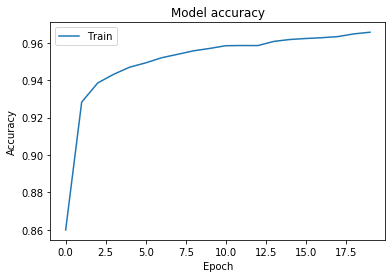

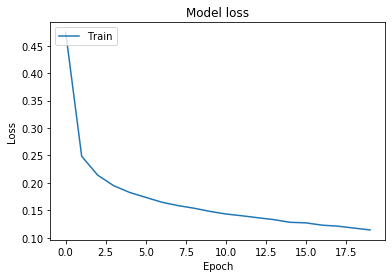

In [17]:
#印出 訓練紀錄資料
print(history.history) 

plt.plot(history.history['accuracy'])  #畫出準確率曲線圖
#plt.plot(history.history['val_acc'])  #舊版寫法
plt.title('Model accuracy') # 圖形標頭
plt.ylabel('Accuracy')  # Y軸 準確率
plt.xlabel('Epoch')     # X軸 回合數
plt.legend(['Train', 'Test'], loc='upper left') # 左上角印出線條小標示說明
plt.show() # 印出圖

# Plot training & validation loss values
plt.plot(history.history['loss'])  #畫出Loss 曲線圖
#plt.plot(history.history['val_loss'])
plt.title('Model loss') # 圖形標頭 
plt.ylabel('Loss')      # Y軸 Loss
plt.xlabel('Epoch')     # X軸 回合數
plt.legend(['Train', 'Test'], loc='upper left') # 左上角印出線條小標示說明
plt.show() # 印出圖

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [18]:
# 評估模型好壞，將10000筆測試資料倒入測試
test_loss, test_acc = model.evaluate(test_images, test_labels)
#印出準確率
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.9532


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [19]:
#預測 10000筆測試資料，預測結果放在 predictions
predictions = model.predict(test_images)
print('done')

done


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
print(predictions.shape) # 檢查 predictions 的維度
predictions[0]  # 印出第0個 預測結果


(10000, 10)


array([9.5662402e-11, 2.4503286e-10, 2.4412882e-06, 3.9469860e-03,
       1.3255271e-13, 9.3037052e-06, 7.7003055e-19, 9.9598962e-01,
       4.9185129e-08, 5.1677613e-05], dtype=float32)

In [21]:
#print(test_images[0]) # 印出第0個測試影像

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see see which label has the highest confidence value:

In [22]:
np.argmax(predictions[0]) #印出第0個測試的預測答案

7

So the model is most confident that this image is an ankle boot, or `class_names[7]`. And we can check the test label to see this is correct:

In [23]:
test_labels[0] #印出第0個測試的標準答案

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

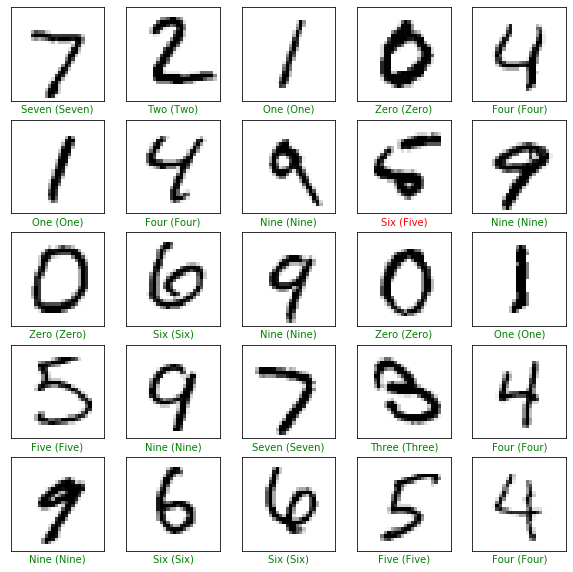

In [24]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
#印出 25 個 測試資料照片 下方標示 前者維預測答案，後者維標準答案
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i].argmax()
    if predicted_label == true_label:
        color = 'green'  # 預測正確 標示綠色
    else:
        color = 'red'   # 預測錯物 標示紅色
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)  # 印出 預測答案、標準答案、設定顏色
      

Finally, use the trained model to make a prediction about a single image. 

In [25]:
# Grab an image from the test dataset   2
#如何測試單筆照片資料
img = test_images[1]

print(img.shape)
#print(img)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
# 增加第0個維度，以符合輸入資料的要求
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [27]:
#透過模型進襲預測
predictions = model.predict(img)
#輸出預測答案
print(predictions)

[[2.1698644e-10 7.6634978e-04 9.9811363e-01 1.8380856e-04 1.6094743e-09
  9.3611085e-04 2.6668938e-09 3.0896717e-12 5.7512221e-08 4.3554795e-17]]


`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [28]:
#擷取第0個答案(也只有一個答案)
prediction = predictions[0]
#印出答案
np.argmax(prediction)

2

And, as before, the model predicts a label of 7.

In [29]:
# 使用 predict_classes 預測
predict_classes = model.predict_classes(test_images)
print(type(predict_classes)) #檢查測試結果資料型態
print(predict_classes.shape, predict_classes)      #印出預測結果
print(test_labels.argmax())
#print(test_labels.argmax(0))
print(test_labels.argmax(axis=1)) #印出標準答案
# 利用 上面標準與預測結果 交互比對，印出混淆矩陣， 觀察那些照片容易被辨識錯誤，提出改善。
# 橫軸預測， 垂直軸標準答案
pd.crosstab(test_labels.argmax(axis=1), predict_classes,
            rownames=['label'],colnames=['predict'])

<class 'numpy.ndarray'>
(10000,) [7 2 1 ... 4 5 6]
7
[7 2 1 ... 4 5 6]


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,956,0,1,3,2,6,3,1,3,5
1,0,1123,5,1,0,0,1,1,4,0
2,6,3,984,6,3,3,4,13,10,0
3,0,4,13,941,4,16,1,10,14,7
4,2,1,4,0,936,0,13,4,2,20
5,7,1,0,21,0,844,6,3,5,5
6,11,4,5,0,3,13,917,1,4,0
7,0,3,16,7,1,3,0,986,1,11
8,5,2,17,19,5,10,3,9,900,4


In [30]:
# quiz - find wrong test images
# quiz - find wrong train images